# Global COVID-19 Clustering Analysis

## Introduction

In this notebook, we perform a clustering analysis on global COVID-19 data. Our goal is to group countries based on similar COVID-19 characteristics, such as the number of confirmed cases, deaths, incident rates, and case fatality ratios. By using clustering, we can identify patterns and trends that reveal how different countries have been affected by the pandemic.

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df_deaths = pd.read_csv ("Dataset/Global/GlobalDecember23.csv")
df_deaths = df_deaths.drop(['FIPS','Admin2', 'Province_State', 'Recovered', 'Active'], axis=1)
df_deaths.to_excel("CleanedData/Cleaned_Global_December23.xlsx", index=False)
df_deaths.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,2023-01-13 04:20:58,33.93911,67.709953,207900,7854,Afghanistan,534.058207,3.777778
1,Albania,2023-01-13 04:20:58,41.15330,20.168300,334018,3596,Albania,11606.713462,1.076589
2,Algeria,2023-01-13 04:20:58,28.03390,1.659600,271277,6881,Algeria,618.632948,2.536522
3,Andorra,2023-01-13 04:20:58,42.50630,1.521800,47781,165,Andorra,61840.419336,0.345326
4,Angola,2023-01-13 04:20:58,-11.20270,17.873900,105095,1930,Angola,319.765542,1.836434


In [24]:
df_vaccine = pd.read_csv ("Dataset/Global/VaccinationGlobal.csv")
df_vaccine = df_vaccine.drop (['Province_State'], axis =1)
df_vaccine.to_excel("CleanedData/Cleaned_Global_Vaccinated.xlsx")
df_vaccine.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2022-09-21,11820186.0,10827184.0,10105500.0,2022-09-21,4.0
1,Albania,2022-09-21,2966256.0,1335654.0,1261243.0,2022-09-21,8.0
2,Algeria,2022-09-21,15267442.0,7840131.0,6481186.0,2022-09-21,12.0
3,Andorra,2022-09-21,154195.0,57893.0,53478.0,2022-09-21,20.0
4,Angola,2022-09-21,22226535.0,14220830.0,7814121.0,2022-09-21,24.0


In [25]:
df_deaths.describe()

,Lat,Long_,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
count,3925.000000,3925.000000,4.016000e+03,4016.000000,3922.000000,3974.000000
mean,35.736183,-71.109728,1.658609e+05,1673.556026,27923.055448,2.088117
std,13.441327,55.361480,1.053279e+06,8724.173904,10510.431628,25.624691
min,-71.949900,-178.116500,0.000000e+00,0.000000,0.000000,0.000000
25%,33.191535,-96.595639,3.769250e+03,46.000000,23578.062579,0.889481
50%,37.895700,-86.717326,1.060800e+04,132.000000,28824.855651,1.286211
75%,42.176955,-77.357900,4.591250e+04,471.250000,33428.419596,1.738915
max,71.706900,178.065000,3.839865e+07,184322.000000,228994.082840,1358.823529


In [26]:
df_vaccine.describe()

,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,UID
count,5.490000e+02,1.770000e+02,1.770000e+02,625.000000
mean,5.307070e+07,5.933927e+07,5.446613e+07,46083.070400
std,5.527153e+08,4.035610e+08,3.723572e+08,80978.116145
min,0.000000e+00,1.884500e+04,1.824800e+04,4.000000
25%,6.847750e+05,8.542560e+05,8.246550e+05,634.000000
50%,2.851115e+06,4.096384e+06,3.611617e+06,25006.000000
75%,1.200333e+07,1.422083e+07,1.256036e+07,64309.000000
max,1.225083e+10,5.119817e+09,4.707934e+09,360035.000000


### **Explanation of Enhanced COVID-19 Case Data Clustering with K-Means**
The graph below is a **K-Means Clustering Visualization** for COVID-19 case data, showing how different countries (or states) have been grouped based on the number of **Confirmed Cases** and **Deaths**. The clusters are represented by three different colors, indicating that the data points were grouped into three clusters. 

**Key Insights:**
- **Clusters Interpretation**:
  - The red dots represent one cluster, which appears to include regions with **low confirmed cases and low deaths**.
  - The green squares likely represent areas with **moderate confirmed cases and moderate deaths**.
  - The blue crosses indicate regions with **high confirmed cases and high deaths**.
- **KDE-Based Contours**:
  - The shaded contours in the background are created using **Kernel Density Estimation (KDE)**. They give an idea of the density distribution of data points within each cluster, indicating where most of the data points are concentrated within that cluster.
- This clustering helps identify trends, such as which regions had high impacts from COVID-19, and can be used for further analysis or policy planning.

/opt/homebrew/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/opt/homebrew/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/opt/homebrew/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


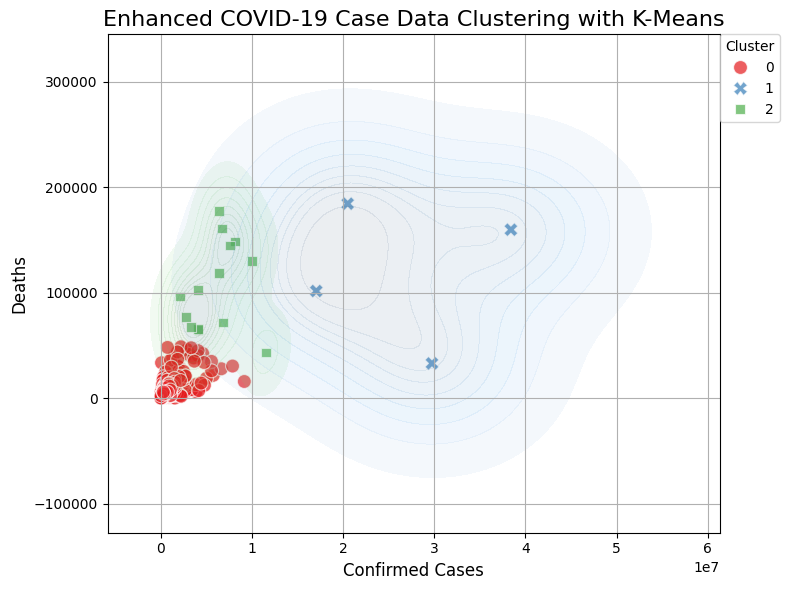

In [27]:
# Step 1: Select Features for Clustering
features_cases = df_deaths[['Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio']]

# Step 2: Handle Missing Values and Standardize
imputer = SimpleImputer(strategy='mean')
features_cases_imputed = imputer.fit_transform(features_cases)
scaler = StandardScaler()
features_cases_scaled = scaler.fit_transform(features_cases_imputed)

# Step 3: Apply K-Means Clustering for COVID-19 Case Data
kmeans_cases = KMeans(n_clusters=3, random_state=42)
df_deaths['Cluster_Cases'] = kmeans_cases.fit_predict(features_cases_scaled)

# Step 4: Visualize the Clusters for Case Data with KDE-Based Boundaries
plt.figure(figsize=(8, 6))

# Scatter plot with improved aesthetics
sns.scatterplot(x=features_cases['Confirmed'], y=features_cases['Deaths'], hue=df_deaths['Cluster_Cases'],
                palette='Set1', s=100, alpha=0.7, style=df_deaths['Cluster_Cases'])

# Draw KDE contours for each cluster to show boundaries
for cluster in df_deaths['Cluster_Cases'].unique():
    cluster_data = features_cases[df_deaths['Cluster_Cases'] == cluster]
    sns.kdeplot(x=cluster_data['Confirmed'], y=cluster_data['Deaths'], 
                fill=True, alpha=0.1, linewidths=1, color=sns.color_palette("Set1")[cluster])

# Enhance plot title and labels
plt.title("Enhanced COVID-19 Case Data Clustering with K-Means", fontsize=16)
plt.xlabel("Confirmed Cases", fontsize=12)
plt.ylabel("Deaths", fontsize=12)
plt.grid(True)

# Adjust legend
plt.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.show()

### **Explanation of Correlation Between COVID-19 Impact and Vaccination Metrics**
The following **Correlation Heatmap** displays the relationships between various COVID-19 impact metrics (e.g., Confirmed Cases, Deaths, Incident Rate, Case Fatality Ratio) and vaccination metrics (e.g., People Partially Vaccinated, People Fully Vaccinated).

**Key Insights:**
- **Positive Correlations**:
  - There is a **strong positive correlation (0.8)** between **Confirmed Cases and Deaths**, suggesting that regions with higher confirmed cases also tend to have more deaths.
  - **Doses Administered** is highly correlated with **People Partially and Fully Vaccinated** (nearly 1), which is expected because higher doses mean more people receiving vaccines.
- **Negative Correlations**:
  - **Incident Rate** has a **negative correlation (-0.43)** with **Case Fatality Ratio**, indicating that regions with higher case fatality rates may have lower incident rates.
  - There are **weak negative correlations** between **vaccination metrics** and **COVID-19 impact metrics** (like Confirmed Cases and Deaths), suggesting that higher vaccination rates might correspond to lower case counts and deaths, but not very strongly.
- This heatmap helps understand how different factors are interrelated, and it can guide public health decisions, like targeting areas with lower vaccination rates or addressing regions with high fatality ratios.

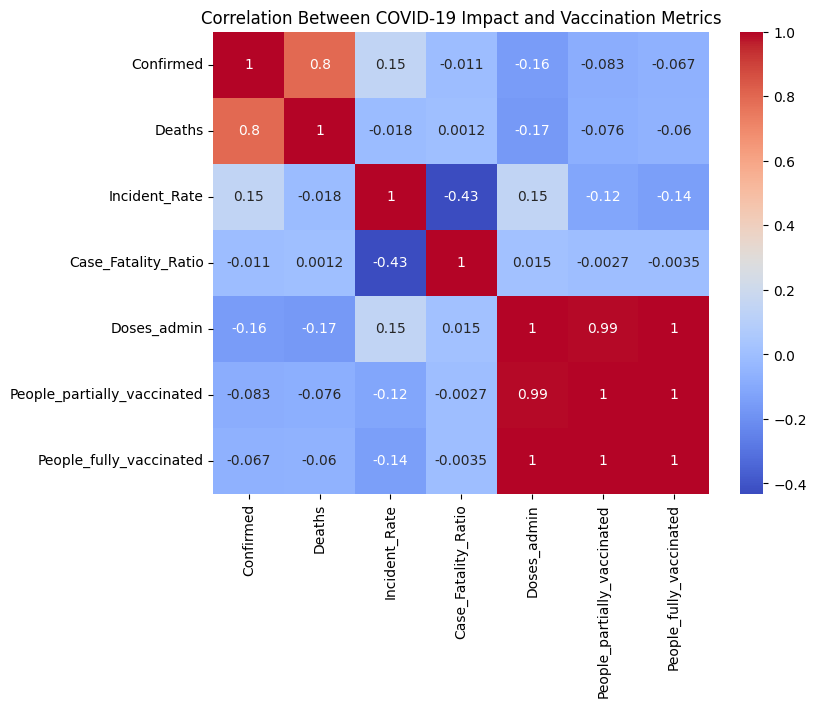

In [28]:
# Step 1: Merge the DataFrames `df_deaths` and `df_vaccine`
df_combined = pd.merge(df_deaths, df_vaccine, on='Country_Region', how='inner')

# Step 2: Select relevant features for correlation analysis
features_combined = df_combined[['Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio',
                                 'Doses_admin', 'People_partially_vaccinated', 'People_fully_vaccinated']]

# Step 3: Generate a correlation matrix
correlation_matrix = features_combined.corr()

# Step 4: Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between COVID-19 Impact and Vaccination Metrics")
plt.show()